# **M6_AI3_RECONOCIMIENTO DE NÚMEROS ESCRITOS A MANO**
---


In [52]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
import math 
import statistics as st
from collections import Counter
import scipy.stats as sp
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import tensorflow as tf



In [53]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# 1.Lectura del dataset desde TensorFlow. 
---


In [54]:
(x_train , y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


# 2.Aplicar las conversiones necesarias para pasar de 3d-array a 2d-array (con “reshape”). 

# 3.Crear la variable “n_train” para poder generar diferentes modelos. 


---


In [55]:

x_train = x_train.reshape(60000,-1) 
x_test = x_test.reshape(10000,-1)

# variables train
n_train = 600
n_train_new = 6000

# variables test 
n_test2 = 100
n_test3 = 10000

# train con 600 
x_train2 = x_train[0:n_train]
y_train2 = y_train[0:n_train]

# test con 100  
x_test2 = x_test[0:n_test2]
y_test2 = y_test[0:n_test2]


# train con 6000
x_train3 = x_train[0:n_train_new]
y_train3 = y_train[0:n_train_new]

# test con 10000
x_test3 = x_test[0:n_test3]
y_test3 = y_test[0:n_test3]



# 4.Generar un modelo con cada uno de los siguientes valores: n_train = 600. n_train = 6000. 

# Modelo de Random Forest


---



*   Modelo 1: train de 600 & test de 100.
*   max depth de 50 y n_estimators 3000.



In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth= 50 , n_estimators= 3000 , random_state=0, n_jobs=5)
rf_model.fit(x_train2 , y_train2)

# los datos del test son los que luego se ejecutan, el modelo que se prueba
#prediccion pobre porque hay pocos datos 
#obserrvo que a mayor cantidad de datos la precision es mejor 




RandomForestClassifier(max_depth=50, n_estimators=3000, n_jobs=5,
                       random_state=0)

In [57]:
pred_train = rf_model.predict(x_train2)
pred_test = rf_model.predict(x_test2)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(x_train2, y_train2)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(x_test2, y_test2)))

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 87.00


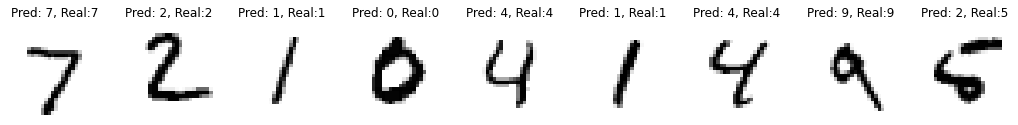

In [58]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, x_test2, pred_test, y_test2):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

    # pred 7, real 5. pred 7 la prediccion del dato de entrenamiento (600 train y test 100)
    # el modelo predice algunos numeros 


*   Modelo 2: train de 6000 & test de 10000
*   max depth de 50 y n_estimators 3000



In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth= 50 , n_estimators= 3000 , random_state=0, n_jobs=5)
rf_model.fit(x_train3 , y_train3)

RandomForestClassifier(max_depth=50, n_estimators=3000, n_jobs=5,
                       random_state=0)

In [60]:
pred_train = rf_model.predict(x_train3)
pred_test = rf_model.predict(x_test3)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(x_train3, y_train3)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(x_test3, y_test3)))

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 94.64


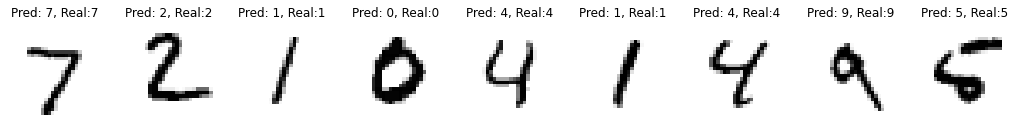

In [61]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, x_test3, pred_test, y_test3):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

    #este modelo predice mejor 

# 5. Realizar diferentes modelos cambiando los valores de n_estimators y max_depth. 
---



*   Modelo 3: train de 600 y test de 10000
*   max depth de 80 y n_estimators 500



In [62]:

rf_model = RandomForestClassifier(max_depth= 80, n_estimators= 500 , random_state=0, n_jobs=5)
rf_model.fit(x_train2 , y_train2)

RandomForestClassifier(max_depth=80, n_estimators=500, n_jobs=5, random_state=0)

In [63]:
pred_train = rf_model.predict(x_train2)
pred_test = rf_model.predict(x_test3)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(x_train2, y_train2)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(x_test3, y_test3)))

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 86.14


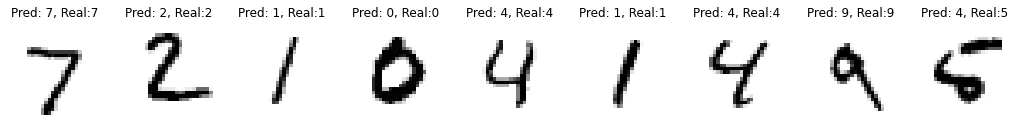

In [64]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, x_test3, pred_test, y_test3):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')



*   Modelo 4: train de 600 y test de 10000
*   max depth de 8 y n_estimators 50


In [66]:

rf_model = RandomForestClassifier(max_depth= 8 , n_estimators= 50, random_state=0, n_jobs=5)
rf_model.fit(x_train2 , y_train2)

RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=5, random_state=0)

In [67]:
pred_train = rf_model.predict(x_train2)
pred_test = rf_model.predict(x_test3)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(x_train2, y_train2)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(x_test3, y_test3)))

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 82.60


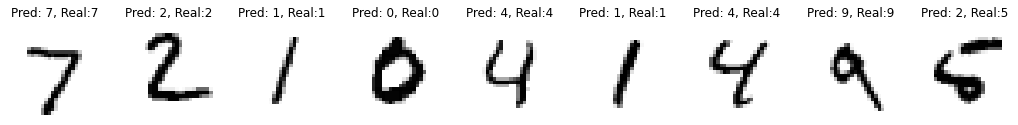

In [68]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, x_test3, pred_test, y_test3):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

# 6. Comentar los resultados de los diferentes modelos. 
---


Modelo 1 : train de 600 & test de 100, max depth de 50 y n_estimators 3000.
Obtengo una precisión sobre los datos de entrenamiento de 100.00 y una
precisión sobre los datos de test de 87.00
Si observo la grafica de los numeros escritos a mano, el modelo es bastante preciso ya que acierta todas las Pred y Real para todos los numeros excepto el ultimo numero donde predice 2 y en realidad el numero es 5.

Modelo 2 : train de 6000 & test de 10000 , max depth de 50 y n_estimators 3000. En este modelo incremento la muestra para train y test.
Obtengo una precisión sobre los datos de entrenamiento de 100.00 y una 
precisión sobre los datos de test de 94.64. Al incrementar la muestra, la precision del test es mejor que la del modelo 1. La mejora del modelo tambien se ve en la grafica, donde el Pred y Real acierta para todos los numeros y no hay ningun fallo.

Modelo 3: train de 600 y test de 10000 , max depth de 80 y n_estimators 500.
En este modelo reduzco la muestra del train, dejo el test en 10000 aumento el max_depth y reduzco el n_estimators a 500. 
Obtengo una precisión sobre los datos de entrenamiento de 100.00 y una 
precisión sobre los datos de test de 86.14. La precision del test es mas baja que la del modelo 1 y el modelo 2.
El modelo falla en el ultimo valor de Pred Real de la grafica, donde predice 4 y el valor real es 5, el resto de numeros estan bien.


Modelo 4: train de 600 y test de 10000 , max depth de 8 y n_estimators 50.
En este modelo bajo aun mas el n_estimators y mantengo los valores de train y test del modelo 3.
La precisión sobre los datos de entrenamiento es de 100.00 y la precisión sobre los datos de test es de 82.60, la mas baja de todos los modelos. Esta claro que cuanto menos n_estimators haya peor se comportara el modelo y menos preciso sera este.
Observo que el modelo falla en la prediccion del ultimo numero, el modelo predice un 2 cuando el numero real es un 5, el resto de valores Pred y Real los acierta.

A modo de conclusion general, el max_depth es la profundidad del AD, cuanto mas alto es este numero mas se ajustan los AD al entrenamiento.
El n_estimators nos indica el numero de arboles de decision, cuanto mayor es el numero, mejor se comportara el modelo.
Podemos confirmar que los resultados obtenidos en nuestros modelos tienen un patron congruente con la logica y el funcionamiento de max_depth y n_estimators, es decir, a mayor numero de max_depth y n_estimators mas preciso/accuarate sera el modelo.


# **Evaluación del modelo**

---

In [69]:
from sklearn import metrics

In [70]:
#y_test3 > corresponde a test de 10000

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test3, pred_test)}\n")

Classification report for classifier RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=5, random_state=0):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       980
           1       0.89      0.97      0.93      1135
           2       0.80      0.83      0.82      1032
           3       0.86      0.78      0.82      1010
           4       0.82      0.79      0.80       982
           5       0.77      0.69      0.73       892
           6       0.86      0.81      0.84       958
           7       0.87      0.87      0.87      1028
           8       0.85      0.72      0.78       974
           9       0.67      0.81      0.73      1009

    accuracy                           0.83     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.83      0.83     10000




Los valores (numeros escritos a mano) que mejor funcionan en precision y recall son el 0 y el 1. Donde peor funciona es en los valores 5 y 9. Esto nos confima que los resultados son congruentes con los resultados de los modelos obtenidos.


Confusion matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


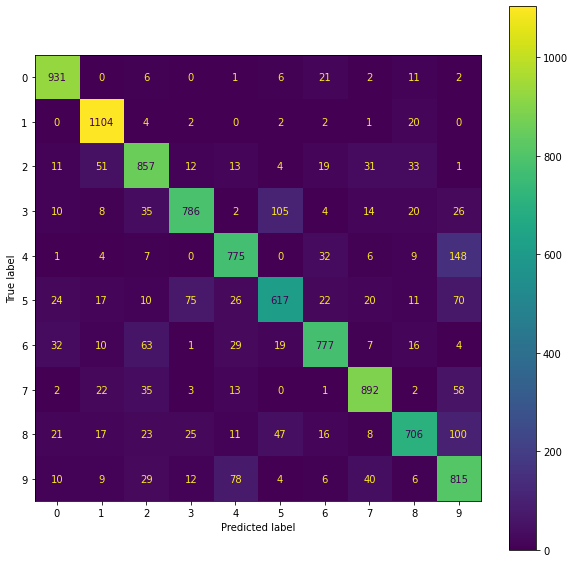

In [71]:
# test de 10000
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(rf_model, x_test3, y_test3, cmap=plt.cm.viridis, ax=ax)
plt.show()

Lanzamos la matriz de confusion, los valores que mejor funcionan son los que estan en amarillo, en este caso el valor 1. Los valores 0, 2 y 7 tambien funcionan bastante bien (se acierta la prediccion para los numeros escrito a mano con mayor frecuencia).
Confirmo que los valores que funcionan peor, es decir, en los que hay mas fallos en la prediccion son el 5 y el 9.

Optimización del modelo
---


In [72]:
# train 6000 & test 10000

md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,30,4)):
  rf_model = RandomForestClassifier(random_state=0, max_depth=maxdepth, n_jobs=5)
  rf_model.fit(x_train3, y_train3)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*rf_model.score(x_train3, y_train3))
  score_test_list.append(100.0*rf_model.score(x_test3, y_test3))

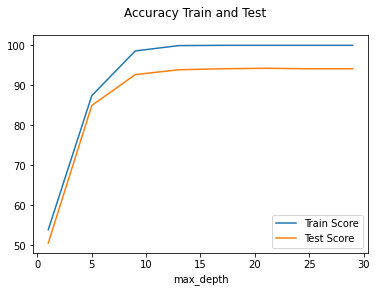

In [73]:
df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();

Observo que el accuracy de train va aumentando esta llegar a 100, en cambio el accuracy de test supera los 90 pero no llega a 100, elegimos un modelo con una profundidad (max_depth) de 15. 


In [75]:
rf_model_15 = RandomForestClassifier(max_depth=15, random_state=0, n_jobs=5)
rf_model_15.fit(x_train3,y_train3)

RandomForestClassifier(max_depth=15, n_jobs=5, random_state=0)

In [78]:
pred_train = rf_model_15.predict(x_train3)
pred_test = rf_model_15.predict(x_test3)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model_15.score(x_train1, y_train1)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model_15.score(x_test2, y_test2)))

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 95.00


Se observa una mejora del accuracy.

Confusion matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


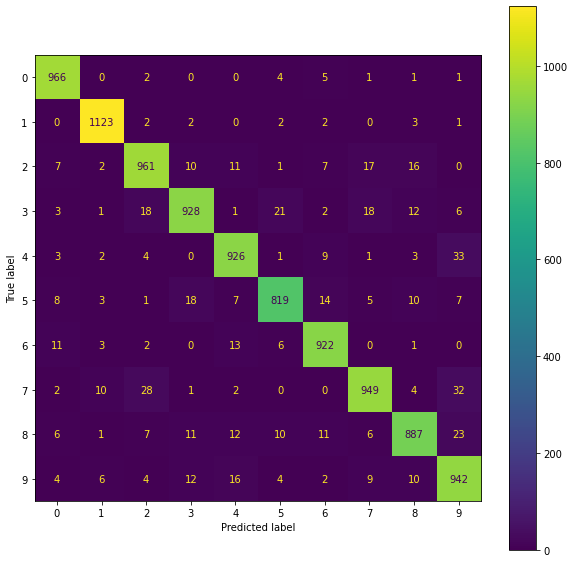

In [80]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(rf_model_15, x_test3, y_test3, cmap=plt.cm.viridis, ax=ax)
plt.show()

Observo que la matriz de confusion esta bastante mejor hay mas valores con colores claros o cercanos al amarillo.
Los valores que mejor funcionan son el 1, el 0, el 2, el 7, el 3 y el 4. En cambio el valor que peor funciona es el 5.






Precision y Recall
---


In [81]:
true_positives_4 = 850
false_positives_4 = 237
false_negatives_4 = 147

Recall = 100.0*true_positives_4/(false_negatives_4+true_positives_4)
Precision = 100.0*true_positives_4/(false_positives_4+true_positives_4)

print (round(Precision,2), round(Recall,2))

78.2 85.26


In [82]:
print(f"Classification report for classifier {rf_model_15}:\n"
      f"{metrics.classification_report(y_test3, pred_test)}\n")

Classification report for classifier RandomForestClassifier(max_depth=15, n_jobs=5, random_state=0):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.95      0.92      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.94      0.92      0.93       892
           6       0.95      0.96      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.94      0.91      0.92       974
           9       0.90      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000


